In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_failure_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
heart_failure_df.shape

(299, 13)

In [4]:
299*0.8

239.20000000000002

In [13]:
train_df = heart_failure_df.sample(239).reset_index().drop(["index"],axis=1)

train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
1,55.0,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
2,50.0,0,196,0,45,0,395000.00,1.60,136,1,1,285,0
3,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
4,70.0,0,618,0,35,0,327000.00,1.10,142,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
235,50.0,0,185,0,30,0,266000.00,0.70,141,1,1,112,0
236,59.0,1,280,1,25,1,302000.00,1.00,141,0,0,78,1
237,60.0,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0


In [14]:
test_df = heart_failure_df.sample(60).reset_index().drop(["index"],axis=1)
test_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.000,0,66,0,40,0,203000.00,1.00,138,1,0,233,0
1,69.000,0,1419,0,40,0,105000.00,1.00,135,1,1,147,0
2,50.000,0,582,0,62,1,147000.00,0.80,140,1,1,192,0
3,72.000,1,943,0,25,1,338000.00,1.70,139,1,1,111,1
4,65.000,0,113,1,25,0,497000.00,1.83,135,1,0,67,1
5,50.000,0,2522,0,30,1,404000.00,0.50,139,0,0,214,0
6,45.000,0,308,1,60,1,377000.00,1.00,136,1,0,186,0
7,63.000,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
8,50.000,1,159,1,30,0,302000.00,1.20,138,0,0,29,0
9,53.000,0,56,0,50,0,308000.00,0.70,135,1,1,231,0


In [15]:
combine = [train_df,test_df]
combine

[      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0    46.0        0                       719         0                 40   
 1    55.0        0                       748         0                 45   
 2    50.0        0                       196         0                 45   
 3    58.0        0                       144         1                 38   
 4    70.0        0                       618         0                 35   
 ..    ...      ...                       ...       ...                ...   
 234  60.0        0                       166         0                 30   
 235  50.0        0                       185         0                 30   
 236  59.0        1                       280         1                 25   
 237  60.0        0                      1211         1                 35   
 238  50.0        1                       111         0                 20   
 
      high_blood_pressure  platelets  serum_creatinine  serum_

In [16]:
train_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
 12  DEATH_EVENT               239 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.4 KB


In [18]:
train_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [19]:
train_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,60.827059,0.443515,492.849372,0.426778,38.523013,0.343096,263560.261799,1.349247,136.732218,0.652720,0.322176,130.284519,0.313808
std,12.170353,0.497842,690.753658,0.495648,11.971188,0.475740,97733.061784,0.898763,4.510893,0.477105,0.468291,78.273992,0.465013
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.600000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,112.500000,0.000000,30.000000,0.000000,206000.000000,0.900000,135.000000,0.000000,0.000000,72.500000,0.000000
50%,60.000000,0.000000,246.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,112.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,305000.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,5209.000000,1.000000,80.000000,1.000000,742000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


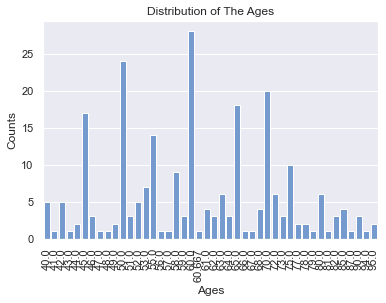

In [33]:
age = train_df["age"].value_counts()
sns.set(style="darkgrid")
sns.barplot(age.index, age.values, color="#69d")
plt.title("Distribution of The Ages")
plt.xlabel("Ages")
plt.xticks(rotation = 90)
plt.ylabel("Counts")
plt.show()

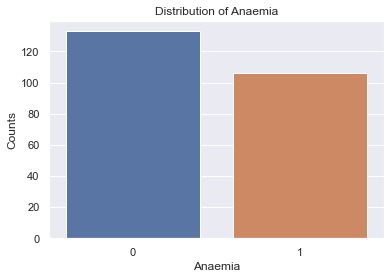

In [34]:
anemia = train_df["anaemia"].value_counts()
sns.set(style="darkgrid")
sns.barplot(anemia.index, anemia.values)
plt.title("Distribution of Anaemia")
plt.xlabel("Anaemia")
plt.ylabel("Counts")
plt.show()

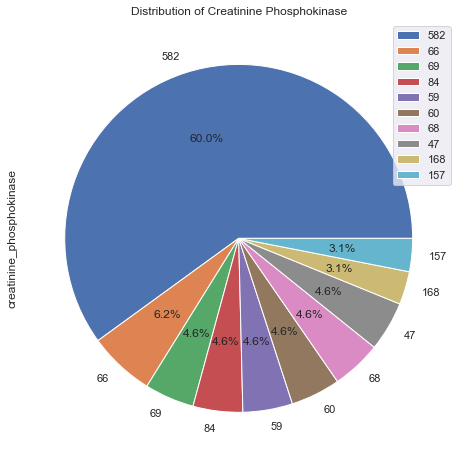

In [35]:
train_df["creatinine_phosphokinase"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Creatinine Phosphokinase")
plt.show()

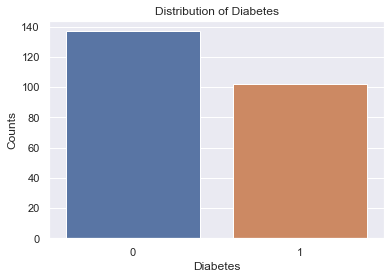

In [36]:
diabetes = train_df["diabetes"].value_counts()
sns.set(style="darkgrid")
sns.barplot(diabetes.index, diabetes.values)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Counts")
plt.show()

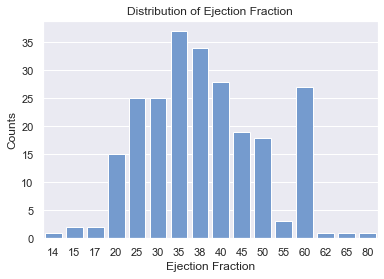

In [37]:
ejection = train_df["ejection_fraction"].value_counts()
sns.set(style="darkgrid")
sns.barplot(ejection.index, ejection.values, color="#69d")
plt.title("Distribution of Ejection Fraction")
plt.xlabel("Ejection Fraction")
plt.ylabel("Counts")
plt.show()

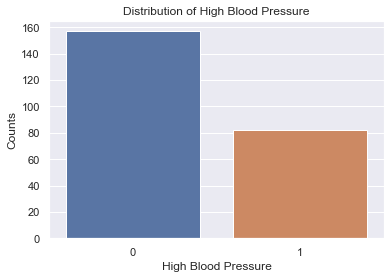

In [38]:
high_blood_pressure = train_df["high_blood_pressure"].value_counts()
sns.set(style="darkgrid")
sns.barplot(high_blood_pressure.index, high_blood_pressure.values)
plt.title("Distribution of High Blood Pressure")
plt.xlabel("High Blood Pressure")
plt.ylabel("Counts")
plt.show()

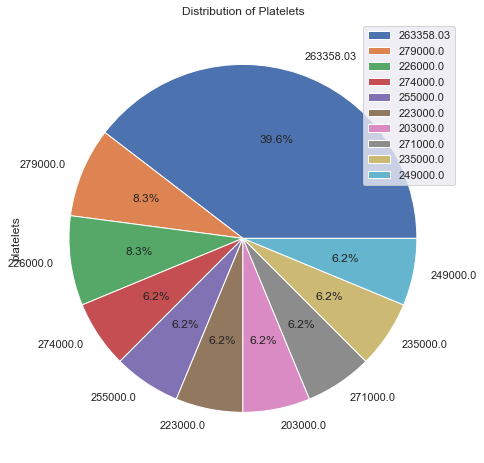

In [39]:
train_df["platelets"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Platelets")
plt.show()

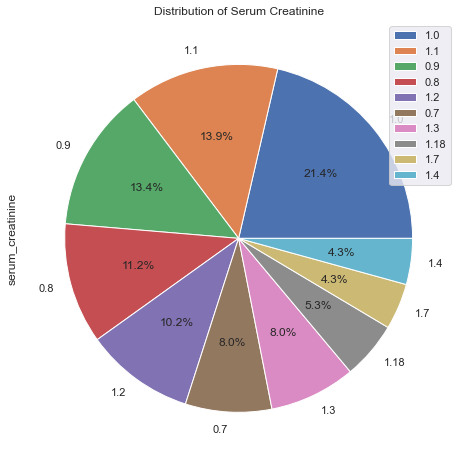

In [40]:
train_df["serum_creatinine"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Serum Creatinine")
plt.show()

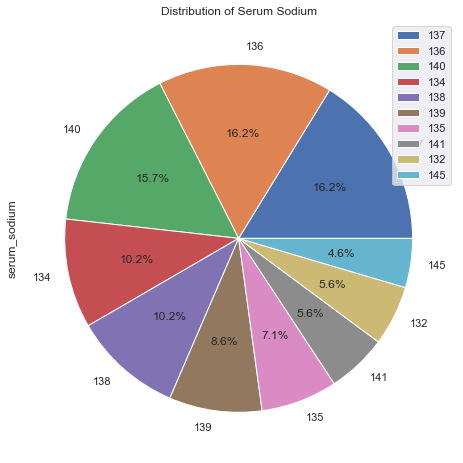

In [41]:
train_df["serum_sodium"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Serum Sodium")
plt.show()

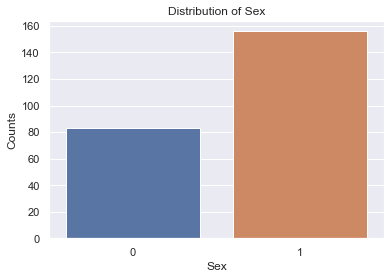

In [42]:
sex = train_df["sex"].value_counts()
sns.set(style="darkgrid")
sns.barplot(sex.index, sex.values)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.show()

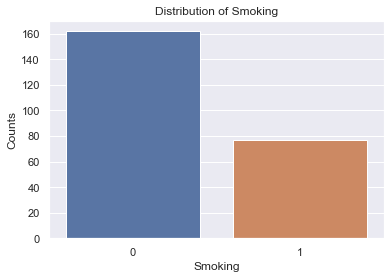

In [43]:
smoking = train_df["smoking"].value_counts()
sns.set(style="darkgrid")
sns.barplot(smoking.index, smoking.values)
plt.title("Distribution of Smoking")
plt.xlabel("Smoking")
plt.ylabel("Counts")
plt.show()

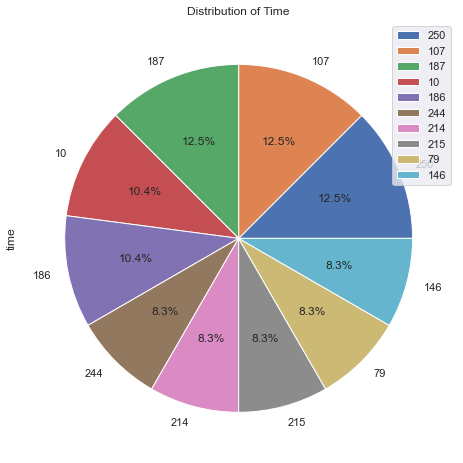

In [44]:
train_df["time"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Time")
plt.show()

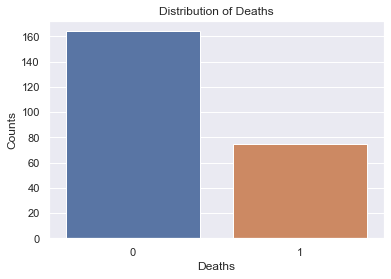

In [45]:
death = train_df["DEATH_EVENT"].value_counts()
sns.set(style="darkgrid")
sns.barplot(death.index, death.values)
plt.title("Distribution of Deaths")
plt.xlabel("Deaths")
plt.ylabel("Counts")
plt.show()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

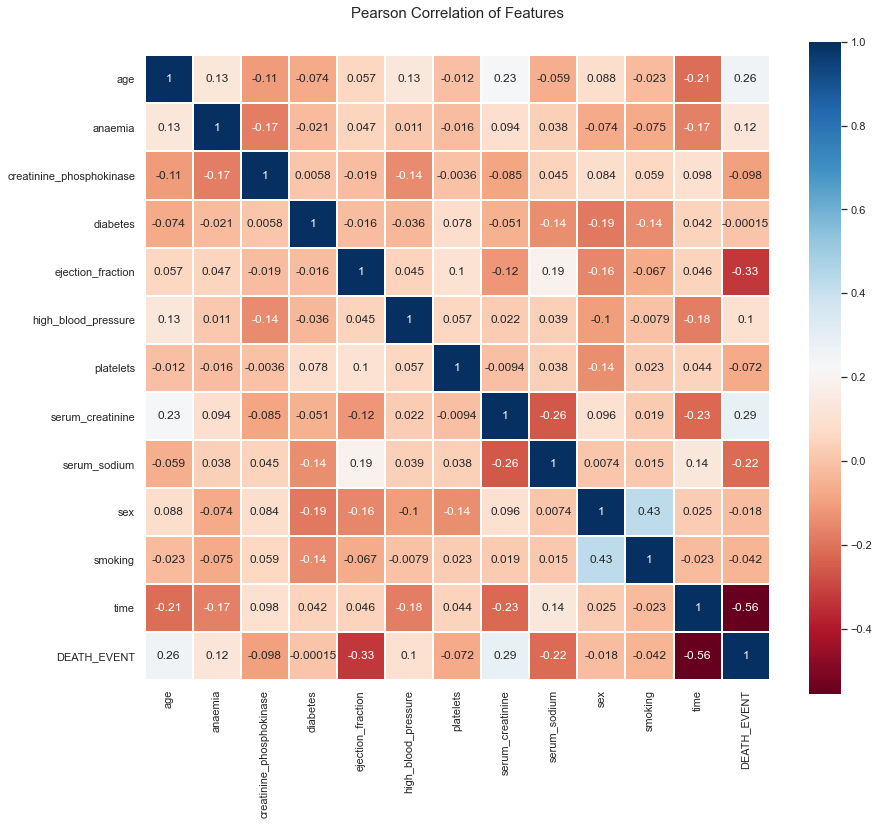

In [46]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [47]:
train_df[["age","DEATH_EVENT"]].groupby(["age"], as_index=False).mean().sort_values(by="age", ascending=False)

,age,DEATH_EVENT
43,95.000,1.000000
42,94.000,1.000000
41,90.000,0.666667
40,87.000,1.000000
39,85.000,0.250000
38,82.000,1.000000
37,81.000,0.000000
36,80.000,0.833333
35,79.000,0.000000
34,78.000,0.000000


In [48]:
train_df[["ejection_fraction","DEATH_EVENT"]].groupby(["ejection_fraction"], as_index=False).mean().sort_values(by="ejection_fraction", ascending=False)

,ejection_fraction,DEATH_EVENT
15,80,0.000000
14,65,1.000000
13,62,0.000000
12,60,0.074074
11,55,0.333333
10,50,0.333333
9,45,0.210526
8,40,0.107143
7,38,0.382353
6,35,0.135135


In [49]:
train_df[["serum_creatinine","DEATH_EVENT"]].groupby(["serum_creatinine"], as_index=False).mean().sort_values(by="serum_creatinine", ascending=False)

,serum_creatinine,DEATH_EVENT
33,9.40,1.000000
32,6.10,0.000000
31,5.80,1.000000
30,4.40,1.000000
29,4.00,1.000000
28,3.50,0.000000
27,3.40,0.000000
26,3.20,0.000000
25,3.00,1.000000
24,2.90,1.000000


In [236]:
train_df[["serum_sodium","DEATH_EVENT"]].groupby(["serum_sodium"], as_index=False).mean().sort_values(by="serum_sodium", ascending=False)

,serum_sodium,DEATH_EVENT
26,148,0.000000
25,146,1.000000
24,145,0.333333
23,144,0.500000
22,143,0.000000
21,142,0.571429
20,141,0.125000
19,140,0.269231
18,139,0.400000
17,138,0.263158


In [50]:
train_df[["time","DEATH_EVENT"]].groupby(["time"], as_index=False).mean().sort_values(by="time", ascending=False)

,time,DEATH_EVENT
129,285,0.0
128,280,0.0
127,278,0.0
126,271,0.0
125,270,0.0
...,...,...
4,11,1.0
3,10,1.0
2,8,1.0
1,7,1.0


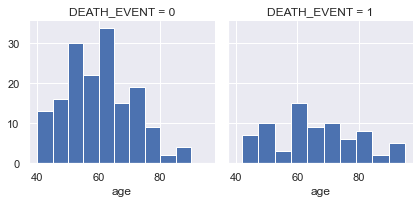

In [51]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "age")

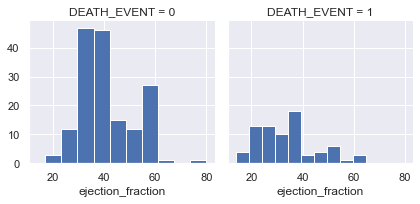

In [52]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "ejection_fraction")

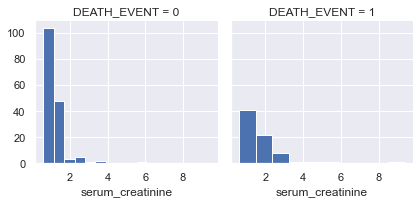

In [53]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "serum_creatinine")

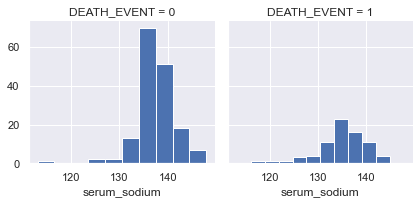

In [54]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "serum_sodium")

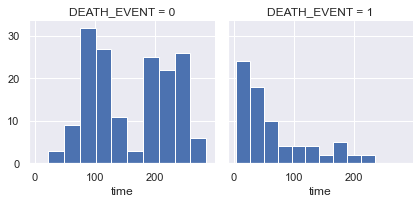

In [55]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "time")

In [56]:
train_df["AgeRange"] = pd.cut(train_df["age"], 6)
train_df[["AgeRange", "DEATH_EVENT"]].groupby(["AgeRange"], as_index=False).mean().sort_values(by="AgeRange", ascending=True)

,AgeRange,DEATH_EVENT
0,"(39.945, 49.167]",0.236842
1,"(49.167, 58.333]",0.203125
2,"(58.333, 67.5]",0.294118
3,"(67.5, 76.667]",0.395349
4,"(76.667, 85.833]",0.526316
5,"(85.833, 95.0]",0.857143


In [57]:
for dataset in combine:
    dataset.loc[dataset["age"] <= 49, "age"] = 0
    dataset.loc[(dataset["age"] > 49) & (dataset["age"] <= 58), "age"] =  1
    dataset.loc[(dataset["age"] > 58) & (dataset["age"] <= 68), "age"] =  2
    dataset.loc[(dataset["age"] > 68) & (dataset["age"] <= 77), "age"] =  3
    dataset.loc[(dataset["age"] > 77) & (dataset["age"] <= 86), "age"] =  4
    dataset.loc[dataset["age"] > 86, "age"] =  5
    dataset["age"] = dataset["age"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,AgeRange
0,0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0,"(39.945, 49.167]"
1,1,0,748,0,45,0,263000.00,1.30,137,1,0,88,0,"(49.167, 58.333]"
2,1,0,196,0,45,0,395000.00,1.60,136,1,1,285,0,"(49.167, 58.333]"
3,1,0,144,1,38,1,327000.00,0.70,142,0,0,83,0,"(49.167, 58.333]"
4,3,0,618,0,35,0,327000.00,1.10,142,0,0,245,0,"(67.5, 76.667]"


In [58]:
train_df = train_df.drop(["AgeRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
1,1,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
2,1,0,196,0,45,0,395000.00,1.60,136,1,1,285,0
3,1,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
4,3,0,618,0,35,0,327000.00,1.10,142,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
235,1,0,185,0,30,0,266000.00,0.70,141,1,1,112,0
236,2,1,280,1,25,1,302000.00,1.00,141,0,0,78,1
237,2,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0


In [59]:
train_df["CreatinineRange"] = pd.cut(train_df["creatinine_phosphokinase"], 6)
train_df[["CreatinineRange", "DEATH_EVENT"]].groupby(["CreatinineRange"], as_index=False).mean().sort_values(by="CreatinineRange", ascending=True)

,CreatinineRange,DEATH_EVENT
0,"(17.814, 887.333]",0.331754
1,"(887.333, 1751.667]",0.166667
2,"(1751.667, 2616.0]",0.272727
3,"(2616.0, 3480.333]",0.000000
4,"(3480.333, 4344.667]",0.000000
5,"(4344.667, 5209.0]",0.000000


In [60]:
for dataset in combine:
    dataset.loc[dataset["creatinine_phosphokinase"] <= 1329, "creatinine_phosphokinase"] = 0
    dataset.loc[(dataset["creatinine_phosphokinase"] > 1329) & (dataset["creatinine_phosphokinase"] <= 2636), "creatinine_phosphokinase"] =  1
    dataset.loc[(dataset["creatinine_phosphokinase"] > 2636) & (dataset["creatinine_phosphokinase"] <= 3942), "creatinine_phosphokinase"] =  2
    dataset.loc[(dataset["creatinine_phosphokinase"] > 3942) & (dataset["creatinine_phosphokinase"] <= 5248), "creatinine_phosphokinase"] =  3
    dataset.loc[(dataset["creatinine_phosphokinase"] > 5248) & (dataset["creatinine_phosphokinase"] <= 6555), "creatinine_phosphokinase"] =  4
    dataset.loc[dataset["creatinine_phosphokinase"] > 6555, "creatinine_phosphokinase"] =  5
    dataset["creatinine_phosphokinase"] = dataset["creatinine_phosphokinase"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,CreatinineRange
0,0,0,0,0,40,1,263358.03,1.18,137,0,0,107,0,"(17.814, 887.333]"
1,1,0,0,0,45,0,263000.00,1.30,137,1,0,88,0,"(17.814, 887.333]"
2,1,0,0,0,45,0,395000.00,1.60,136,1,1,285,0,"(17.814, 887.333]"
3,1,0,0,1,38,1,327000.00,0.70,142,0,0,83,0,"(17.814, 887.333]"
4,3,0,0,0,35,0,327000.00,1.10,142,0,0,245,0,"(17.814, 887.333]"


In [61]:
train_df = train_df.drop(["CreatinineRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,40,1,263358.03,1.18,137,0,0,107,0
1,1,0,0,0,45,0,263000.00,1.30,137,1,0,88,0
2,1,0,0,0,45,0,395000.00,1.60,136,1,1,285,0
3,1,0,0,1,38,1,327000.00,0.70,142,0,0,83,0
4,3,0,0,0,35,0,327000.00,1.10,142,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,0,0,30,0,62000.00,1.70,127,0,0,207,1
235,1,0,0,0,30,0,266000.00,0.70,141,1,1,112,0
236,2,1,0,1,25,1,302000.00,1.00,141,0,0,78,1
237,2,0,0,1,35,0,263358.03,1.80,113,1,1,186,0


In [62]:
train_df["EjectionRange"] = pd.cut(train_df["ejection_fraction"], 6)
train_df[["EjectionRange", "DEATH_EVENT"]].groupby(["EjectionRange"], as_index=False).mean().sort_values(by="EjectionRange", ascending=True)

,EjectionRange,DEATH_EVENT
0,"(13.934, 25.0]",0.666667
1,"(25.0, 36.0]",0.241935
2,"(36.0, 47.0]",0.246914
3,"(47.0, 58.0]",0.333333
4,"(58.0, 69.0]",0.103448
5,"(69.0, 80.0]",0.000000


In [63]:
for dataset in combine:
    dataset.loc[dataset["ejection_fraction"] <= 25, "ejection_fraction"] = 0
    dataset.loc[(dataset["ejection_fraction"] > 25) & (dataset["ejection_fraction"] <= 36), "ejection_fraction"] =  1
    dataset.loc[(dataset["ejection_fraction"] > 36) & (dataset["ejection_fraction"] <= 47), "ejection_fraction"] =  2
    dataset.loc[(dataset["ejection_fraction"] > 47) & (dataset["ejection_fraction"] <= 58), "ejection_fraction"] =  3
    dataset.loc[(dataset["ejection_fraction"] > 58) & (dataset["ejection_fraction"] <= 69), "ejection_fraction"] =  4
    dataset.loc[dataset["ejection_fraction"] > 69, "ejection_fraction"] =  5
    dataset["ejection_fraction"] = dataset["ejection_fraction"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,EjectionRange
0,0,0,0,0,2,1,263358.03,1.18,137,0,0,107,0,"(36.0, 47.0]"
1,1,0,0,0,2,0,263000.00,1.30,137,1,0,88,0,"(36.0, 47.0]"
2,1,0,0,0,2,0,395000.00,1.60,136,1,1,285,0,"(36.0, 47.0]"
3,1,0,0,1,2,1,327000.00,0.70,142,0,0,83,0,"(36.0, 47.0]"
4,3,0,0,0,1,0,327000.00,1.10,142,0,0,245,0,"(25.0, 36.0]"


In [64]:
train_df = train_df.drop(["EjectionRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,2,1,263358.03,1.18,137,0,0,107,0
1,1,0,0,0,2,0,263000.00,1.30,137,1,0,88,0
2,1,0,0,0,2,0,395000.00,1.60,136,1,1,285,0
3,1,0,0,1,2,1,327000.00,0.70,142,0,0,83,0
4,3,0,0,0,1,0,327000.00,1.10,142,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,0,0,1,0,62000.00,1.70,127,0,0,207,1
235,1,0,0,0,1,0,266000.00,0.70,141,1,1,112,0
236,2,1,0,1,0,1,302000.00,1.00,141,0,0,78,1
237,2,0,0,1,1,0,263358.03,1.80,113,1,1,186,0


In [65]:
train_df["PlateletsRange"] = pd.cut(train_df["platelets"], 6)
train_df[["PlateletsRange", "DEATH_EVENT"]].groupby(["PlateletsRange"], as_index=False).mean().sort_values(by="PlateletsRange", ascending=True)

,PlateletsRange,DEATH_EVENT
0,"(24383.1, 144583.333]",0.500000
1,"(144583.333, 264066.667]",0.310345
2,"(264066.667, 383550.0]",0.240506
3,"(383550.0, 503033.333]",0.500000
4,"(503033.333, 622516.667]",0.200000
5,"(622516.667, 742000.0]",0.000000


In [66]:
for dataset in combine:
    dataset.loc[dataset["platelets"] <= 180833, "platelets"] = 0
    dataset.loc[(dataset["platelets"] > 180833) & (dataset["platelets"] <= 314667), "platelets"] =  1
    dataset.loc[(dataset["platelets"] > 314667) & (dataset["platelets"] <= 448500), "platelets"] =  2
    dataset.loc[(dataset["platelets"] > 448500) & (dataset["platelets"] <= 582333), "platelets"] =  3
    dataset.loc[(dataset["platelets"] > 582333) & (dataset["platelets"] <= 716167), "platelets"] =  4
    dataset.loc[dataset["platelets"] > 716167, "platelets"] =  5
    dataset["platelets"] = dataset["platelets"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,PlateletsRange
0,0,0,0,0,2,1,1,1.18,137,0,0,107,0,"(144583.333, 264066.667]"
1,1,0,0,0,2,0,1,1.30,137,1,0,88,0,"(144583.333, 264066.667]"
2,1,0,0,0,2,0,2,1.60,136,1,1,285,0,"(383550.0, 503033.333]"
3,1,0,0,1,2,1,2,0.70,142,0,0,83,0,"(264066.667, 383550.0]"
4,3,0,0,0,1,0,2,1.10,142,0,0,245,0,"(264066.667, 383550.0]"


In [67]:
train_df = train_df.drop(["PlateletsRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,2,1,1,1.18,137,0,0,107,0
1,1,0,0,0,2,0,1,1.30,137,1,0,88,0
2,1,0,0,0,2,0,2,1.60,136,1,1,285,0
3,1,0,0,1,2,1,2,0.70,142,0,0,83,0
4,3,0,0,0,1,0,2,1.10,142,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,0,0,1,0,0,1.70,127,0,0,207,1
235,1,0,0,0,1,0,1,0.70,141,1,1,112,0
236,2,1,0,1,0,1,1,1.00,141,0,0,78,1
237,2,0,0,1,1,0,1,1.80,113,1,1,186,0


In [68]:
train_df["SerumCRange"] = pd.cut(train_df["serum_creatinine"], 6)
train_df[["SerumCRange", "DEATH_EVENT"]].groupby(["SerumCRange"], as_index=False).mean().sort_values(by="SerumCRange", ascending=True)

,SerumCRange,DEATH_EVENT
0,"(0.591, 2.067]",0.276995
1,"(2.067, 3.533]",0.571429
2,"(3.533, 5.0]",1.000000
3,"(5.0, 6.467]",0.500000
4,"(6.467, 7.933]",NaN
5,"(7.933, 9.4]",1.000000


In [69]:
for dataset in combine:
    dataset.loc[dataset["serum_creatinine"] <= 2, "serum_creatinine"] = 0
    dataset.loc[(dataset["serum_creatinine"] > 2) & (dataset["serum_creatinine"] <= 4), "serum_creatinine"] =  1
    dataset.loc[(dataset["serum_creatinine"] > 4) & (dataset["serum_creatinine"] <= 5), "serum_creatinine"] =  2
    dataset.loc[(dataset["serum_creatinine"] > 5) & (dataset["serum_creatinine"] <= 6), "serum_creatinine"] =  3
    dataset.loc[(dataset["serum_creatinine"] > 6) & (dataset["serum_creatinine"] <= 8), "serum_creatinine"] =  4
    dataset.loc[dataset["serum_creatinine"] > 8, "serum_creatinine"] =  5
    dataset["serum_creatinine"] = dataset["serum_creatinine"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,SerumCRange
0,0,0,0,0,2,1,1,0,137,0,0,107,0,"(0.591, 2.067]"
1,1,0,0,0,2,0,1,0,137,1,0,88,0,"(0.591, 2.067]"
2,1,0,0,0,2,0,2,0,136,1,1,285,0,"(0.591, 2.067]"
3,1,0,0,1,2,1,2,0,142,0,0,83,0,"(0.591, 2.067]"
4,3,0,0,0,1,0,2,0,142,0,0,245,0,"(0.591, 2.067]"


In [70]:
train_df = train_df.drop(["SerumCRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,2,1,1,0,137,0,0,107,0
1,1,0,0,0,2,0,1,0,137,1,0,88,0
2,1,0,0,0,2,0,2,0,136,1,1,285,0
3,1,0,0,1,2,1,2,0,142,0,0,83,0
4,3,0,0,0,1,0,2,0,142,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,0,0,1,0,0,0,127,0,0,207,1
235,1,0,0,0,1,0,1,0,141,1,1,112,0
236,2,1,0,1,0,1,1,0,141,0,0,78,1
237,2,0,0,1,1,0,1,0,113,1,1,186,0


In [71]:
train_df["SerumSRange"] = pd.cut(train_df["serum_sodium"], 6)
train_df[["SerumSRange", "DEATH_EVENT"]].groupby(["SerumSRange"], as_index=False).mean().sort_values(by="SerumSRange", ascending=True)

,SerumSRange,DEATH_EVENT
0,"(112.965, 118.833]",0.500000
1,"(118.833, 124.667]",1.000000
2,"(124.667, 130.5]",0.636364
3,"(130.5, 136.333]",0.377778
4,"(136.333, 142.167]",0.226891
5,"(142.167, 148.0]",0.266667


In [72]:
for dataset in combine:
    dataset.loc[dataset["serum_sodium"] <= 119, "serum_sodium"] = 0
    dataset.loc[(dataset["serum_sodium"] > 119) & (dataset["serum_sodium"] <= 125), "serum_sodium"] =  1
    dataset.loc[(dataset["serum_sodium"] > 125) & (dataset["serum_sodium"] <= 131), "serum_sodium"] =  2
    dataset.loc[(dataset["serum_sodium"] > 131) & (dataset["serum_sodium"] <= 136), "serum_sodium"] =  3
    dataset.loc[(dataset["serum_sodium"] > 136) & (dataset["serum_sodium"] <= 142), "serum_sodium"] =  4
    dataset.loc[dataset["serum_sodium"] > 142, "serum_sodium"] =  5
    dataset["serum_sodium"] = dataset["serum_sodium"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,SerumSRange
0,0,0,0,0,2,1,1,0,4,0,0,107,0,"(136.333, 142.167]"
1,1,0,0,0,2,0,1,0,4,1,0,88,0,"(136.333, 142.167]"
2,1,0,0,0,2,0,2,0,3,1,1,285,0,"(130.5, 136.333]"
3,1,0,0,1,2,1,2,0,4,0,0,83,0,"(136.333, 142.167]"
4,3,0,0,0,1,0,2,0,4,0,0,245,0,"(136.333, 142.167]"


In [73]:
train_df = train_df.drop(["SerumSRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,2,1,1,0,4,0,0,107,0
1,1,0,0,0,2,0,1,0,4,1,0,88,0
2,1,0,0,0,2,0,2,0,3,1,1,285,0
3,1,0,0,1,2,1,2,0,4,0,0,83,0
4,3,0,0,0,1,0,2,0,4,0,0,245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,0,0,1,0,0,0,2,0,0,207,1
235,1,0,0,0,1,0,1,0,4,1,1,112,0
236,2,1,0,1,0,1,1,0,4,0,0,78,1
237,2,0,0,1,1,0,1,0,0,1,1,186,0


In [74]:
train_df["TimeRange"] = pd.cut(train_df["time"], 6)
train_df[["TimeRange", "DEATH_EVENT"]].groupby(["TimeRange"], as_index=False).mean().sort_values(by="TimeRange", ascending=True)

,TimeRange,DEATH_EVENT
0,"(3.719, 50.833]",0.933333
1,"(50.833, 97.667]",0.254545
2,"(97.667, 144.5]",0.222222
3,"(144.5, 191.333]",0.212121
4,"(191.333, 238.167]",0.095238
5,"(238.167, 285.0]",0.000000


In [75]:
for dataset in combine:
    dataset.loc[dataset["time"] <= 38, "time"] = 0
    dataset.loc[(dataset["time"] > 38) & (dataset["time"] <= 73), "time"] =  1
    dataset.loc[(dataset["time"] > 73) & (dataset["time"] <= 107), "time"] =  2
    dataset.loc[(dataset["time"] > 107) & (dataset["time"] <= 141), "time"] =  3
    dataset.loc[(dataset["time"] > 141) & (dataset["time"] <= 175), "time"] =  4
    dataset.loc[dataset["time"] > 175, "time"] =  5
    dataset["time"] = dataset["time"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,TimeRange
0,0,0,0,0,2,1,1,0,4,0,0,2,0,"(97.667, 144.5]"
1,1,0,0,0,2,0,1,0,4,1,0,2,0,"(50.833, 97.667]"
2,1,0,0,0,2,0,2,0,3,1,1,5,0,"(238.167, 285.0]"
3,1,0,0,1,2,1,2,0,4,0,0,2,0,"(50.833, 97.667]"
4,3,0,0,0,1,0,2,0,4,0,0,5,0,"(238.167, 285.0]"


In [76]:
train_df = train_df.drop(["TimeRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,2,1,1,0,4,0,0,2,0
1,1,0,0,0,2,0,1,0,4,1,0,2,0
2,1,0,0,0,2,0,2,0,3,1,1,5,0
3,1,0,0,1,2,1,2,0,4,0,0,2,0
4,3,0,0,0,1,0,2,0,4,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2,0,0,0,1,0,0,0,2,0,0,5,1
235,1,0,0,0,1,0,1,0,4,1,1,3,0
236,2,1,0,1,0,1,1,0,4,0,0,2,1
237,2,0,0,1,1,0,1,0,0,1,1,5,0


In [77]:
train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,0,0,0,2,1,1,0,4,0,0,2,0
1,1,0,0,0,2,0,1,0,4,1,0,2,0
2,1,0,0,0,2,0,2,0,3,1,1,5,0
3,1,0,0,1,2,1,2,0,4,0,0,2,0
4,3,0,0,0,1,0,2,0,4,0,0,5,0


In [78]:
test_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,0,0,0,2,0,1,0,4,1,0,5,0
1,3,0,1,0,2,0,0,0,3,1,1,4,0
2,1,0,0,0,4,1,0,0,4,1,1,5,0
3,3,1,0,0,0,1,2,0,4,1,1,3,1
4,2,0,0,1,0,0,3,0,3,1,0,1,1


In [79]:
X_train = train_df.drop(["DEATH_EVENT"], axis=1)
Y_train = train_df["DEATH_EVENT"]
X_test = test_df.drop(["DEATH_EVENT"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((239, 12), (239,), (60, 12))

In [80]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy for logistic regression : {}".format(acc_log))

Accuracy for logistic regression : 86.61


In [81]:
coeff_df = pd.DataFrame(train_df.columns.delete(12))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,age,0.456384
1,anaemia,0.127134
6,platelets,0.088386
5,high_blood_pressure,0.060938
7,serum_creatinine,-0.056982
9,sex,-0.212127
3,diabetes,-0.245693
2,creatinine_phosphokinase,-0.393416
10,smoking,-0.568942
8,serum_sodium,-0.599709


In [82]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("Accuracy for Support Vector Machines : {}".format(acc_svc))

Accuracy for Support Vector Machines : 89.54


In [83]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy for KNN : {}".format(acc_knn))

Accuracy for KNN : 88.28


In [84]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("Accuracy for Gaussian NB : {}".format(acc_gaussian))

Accuracy for Gaussian NB : 87.45


In [85]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print("Accuracy for Perceptron : {}".format(acc_perceptron))

Accuracy for Perceptron : 84.94


In [90]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("Accuracy for Linear SVC : {}".format(acc_linear_svc))

Accuracy for Linear SVC : 86.19


In [86]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print("Accuracy for SGD : {}".format(acc_sgd))

Accuracy for SGD : 86.19


In [87]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy for Decision Tree : {}".format(acc_decision_tree))

Accuracy for Decision Tree : 100.0


In [88]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy for Random Forest : {}".format(acc_decision_tree))

Accuracy for Random Forest : 100.0


In [91]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,89.54
1,KNN,88.28
4,Naive Bayes,87.45
2,Logistic Regression,86.61
6,Stochastic Gradient Decent,86.19
7,Linear SVC,86.19
5,Perceptron,84.94


In [96]:
submission = pd.DataFrame({"death": Y_pred})

In [97]:
submission

,death
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [98]:
submission.to_csv("submission.csv", index=False)

In [99]:
result = pd.concat([X_test, submission], ignore_index=True)
result

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,5.0,NaN
1,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,4.0,NaN
2,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,1.0,1.0,5.0,NaN
3,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,1.0,3.0,NaN
4,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<AxesSubplot:xlabel='death'>

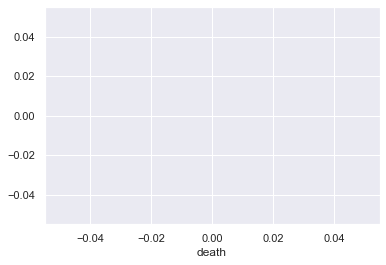

In [101]:
sns.scatterplot(data=submission, x="death")